In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopy.distance

In [2]:
df = pd.read_csv("../data/Cleaned_data.csv", index_col=False)
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),date_column_ddmmyyy
0,0x72e,VADRES19DEL01,30.0,4.7,22.311844,73.165081,22.421844,73.275081,2022-03-20,19:55:00,...,conditions Sandstorms,Jam,0.0,Meal,motorcycle,1.0,No,Metropolitian,34.0,20032022
1,0x6c3,VADRES18DEL03,30.0,4.7,0.000000,0.000000,0.060000,0.060000,2022-04-03,20:10:00,...,conditions Sandstorms,Jam,0.0,Buffet,motorcycle,1.0,No,Metropolitian,46.0,3042022
2,0xd6b,VADRES18DEL01,30.0,4.7,0.000000,0.000000,0.010000,0.010000,2022-03-28,9:40:00,...,conditions Sunny,Low,0.0,Drinks,motorcycle,1.0,No,Metropolitian,19.0,28032022
3,0x64c,VADRES16DEL02,30.0,4.7,0.000000,0.000000,0.080000,0.080000,2022-03-02,18:40:00,...,conditions Cloudy,Medium,1.0,Drinks,motorcycle,1.0,No,Metropolitian,42.0,2032022
4,0x18db,VADRES16DEL01,30.0,4.7,0.000000,0.000000,0.110000,0.110000,2022-03-29,19:35:00,...,conditions Windy,Jam,0.0,Snack,motorcycle,1.0,No,Metropolitian,44.0,29032022


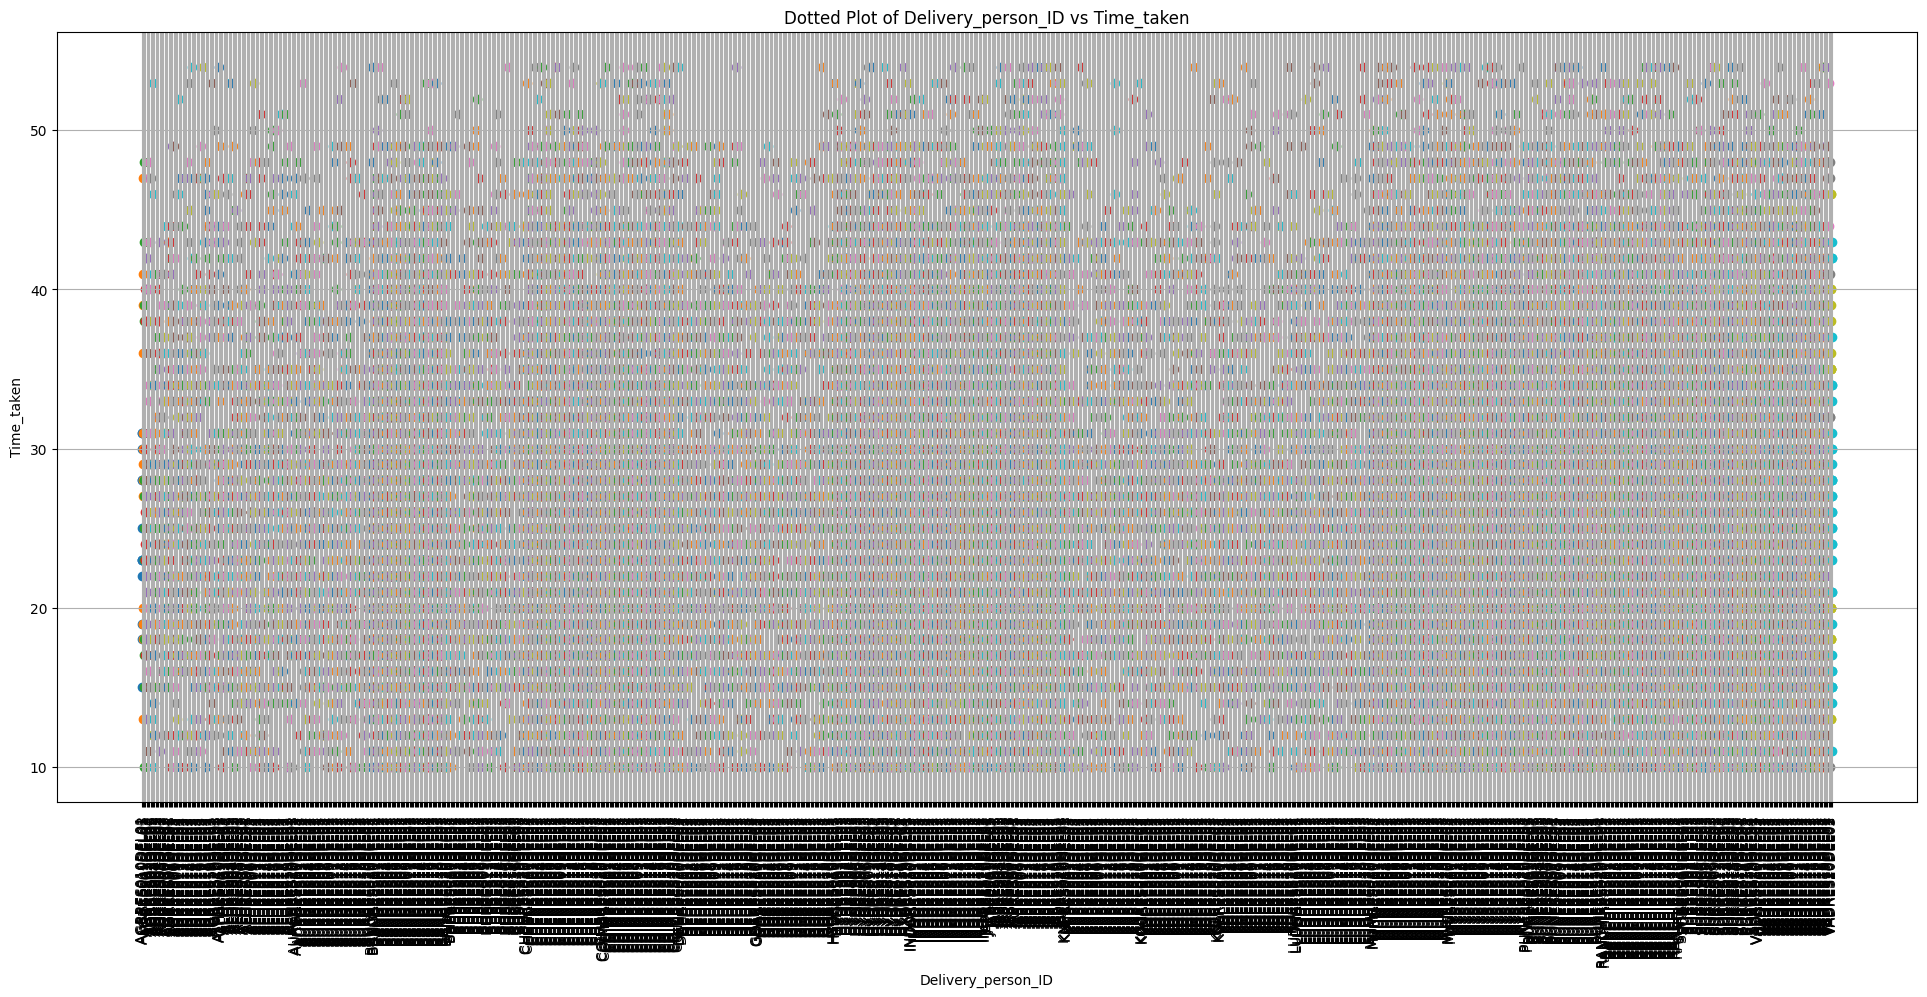

In [3]:
##Plotting Delivery_person_ID Vs Time_taken(min)
plt.figure(figsize= (24,10))


for key, grp in df.groupby('Delivery_person_ID'):
    plt.scatter(grp['Delivery_person_ID'], grp['Time_taken(min)'], label=key)

plt.xlabel('Delivery_person_ID')  # Label for x-axis
plt.ylabel('Time_taken')  # Label for y-axis
plt.title('Dotted Plot of Delivery_person_ID vs Time_taken')  # Plot title
plt.xticks(rotation=90)
plt.grid(True)  # Optional: add a grid
plt.show()

#### I misunderstood that Delivery_person_ID is the ID attached to a particular Deliver person
#### but in the dataset it is related to the restaurant ID.
#### So our analysis should be focussed on the restauarant instead of Delivery person for this column
#### I am renaming the column "Delivery_person_ID" as "Restauarant_ID"

In [4]:
df.rename({'Delivery_person_ID' : 'Restaurant_ID'}, axis =1, inplace = True)
df.head(4)

,ID,Restaurant_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),date_column_ddmmyyy
0,0x72e,VADRES19DEL01,30.0,4.7,22.311844,73.165081,22.421844,73.275081,2022-03-20,19:55:00,...,conditions Sandstorms,Jam,0.0,Meal,motorcycle,1.0,No,Metropolitian,34.0,20032022
1,0x6c3,VADRES18DEL03,30.0,4.7,0.000000,0.000000,0.060000,0.060000,2022-04-03,20:10:00,...,conditions Sandstorms,Jam,0.0,Buffet,motorcycle,1.0,No,Metropolitian,46.0,3042022
2,0xd6b,VADRES18DEL01,30.0,4.7,0.000000,0.000000,0.010000,0.010000,2022-03-28,9:40:00,...,conditions Sunny,Low,0.0,Drinks,motorcycle,1.0,No,Metropolitian,19.0,28032022
3,0x64c,VADRES16DEL02,30.0,4.7,0.000000,0.000000,0.080000,0.080000,2022-03-02,18:40:00,...,conditions Cloudy,Medium,1.0,Drinks,motorcycle,1.0,No,Metropolitian,42.0,2032022


In [5]:
df.Restaurant_ID.nunique()
## 1320 unique restaurants

1320

In [6]:
count_restaurants = df["Restaurant_ID"].value_counts()

In [7]:
count_restaurants

Restaurant_ID
PUNERES01DEL01     65
JAPRES11DEL02      65
JAPRES09DEL02      65
VADRES11DEL02      65
INDORES08DEL02     64
                   ..
KOLRES09DEL03       6
BHPRES15DEL03       6
AURGRES05DEL03      6
GOARES01DEL03       6
BHPRES010DEL03      4
Name: count, Length: 1320, dtype: int64

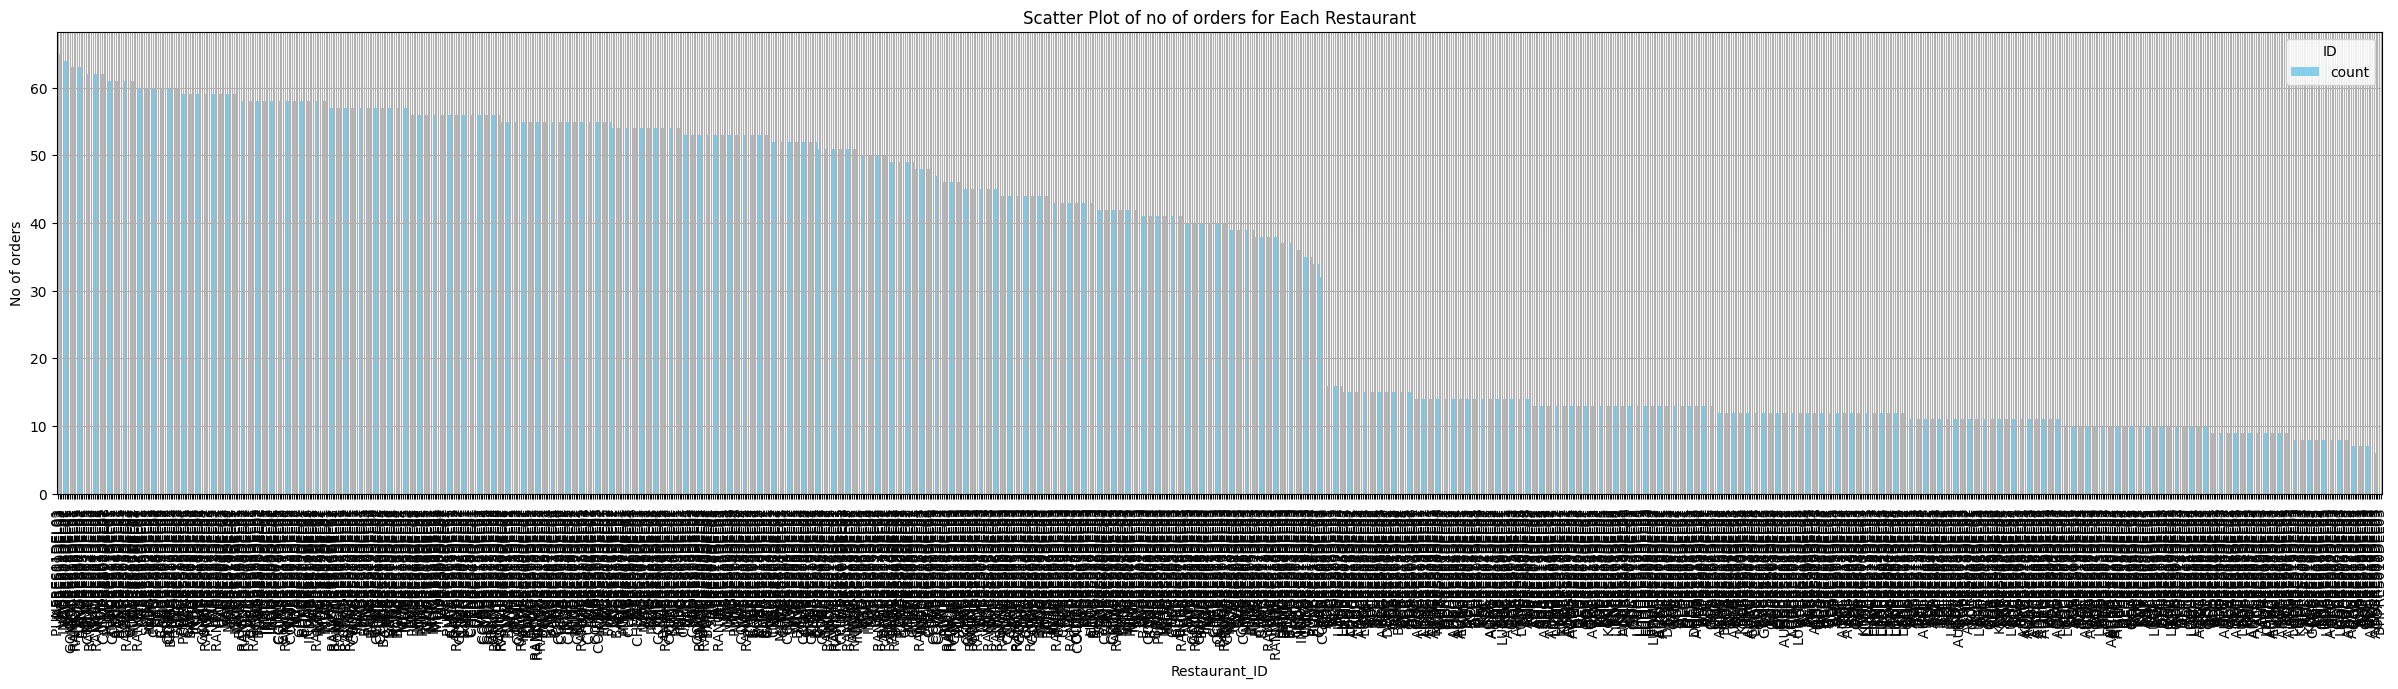

In [8]:
plt.figure(figsize=(30, 6))  # Optional: specify figure size

count_restaurants = df["Restaurant_ID"].value_counts()

count_restaurants.plot(kind='bar', color='skyblue')
plt.xlabel('Restaurant_ID')  # Label for x-axis
plt.ylabel('No of orders')  # Label for y-axis
plt.title('Scatter Plot of no of orders for Each Restaurant')  # Plot title
plt.xticks(rotation=90)
plt.legend(title='ID')  
plt.grid(True) 
plt.show()

### We see half of the restaurants have orders above 30 and remaining have less than 30

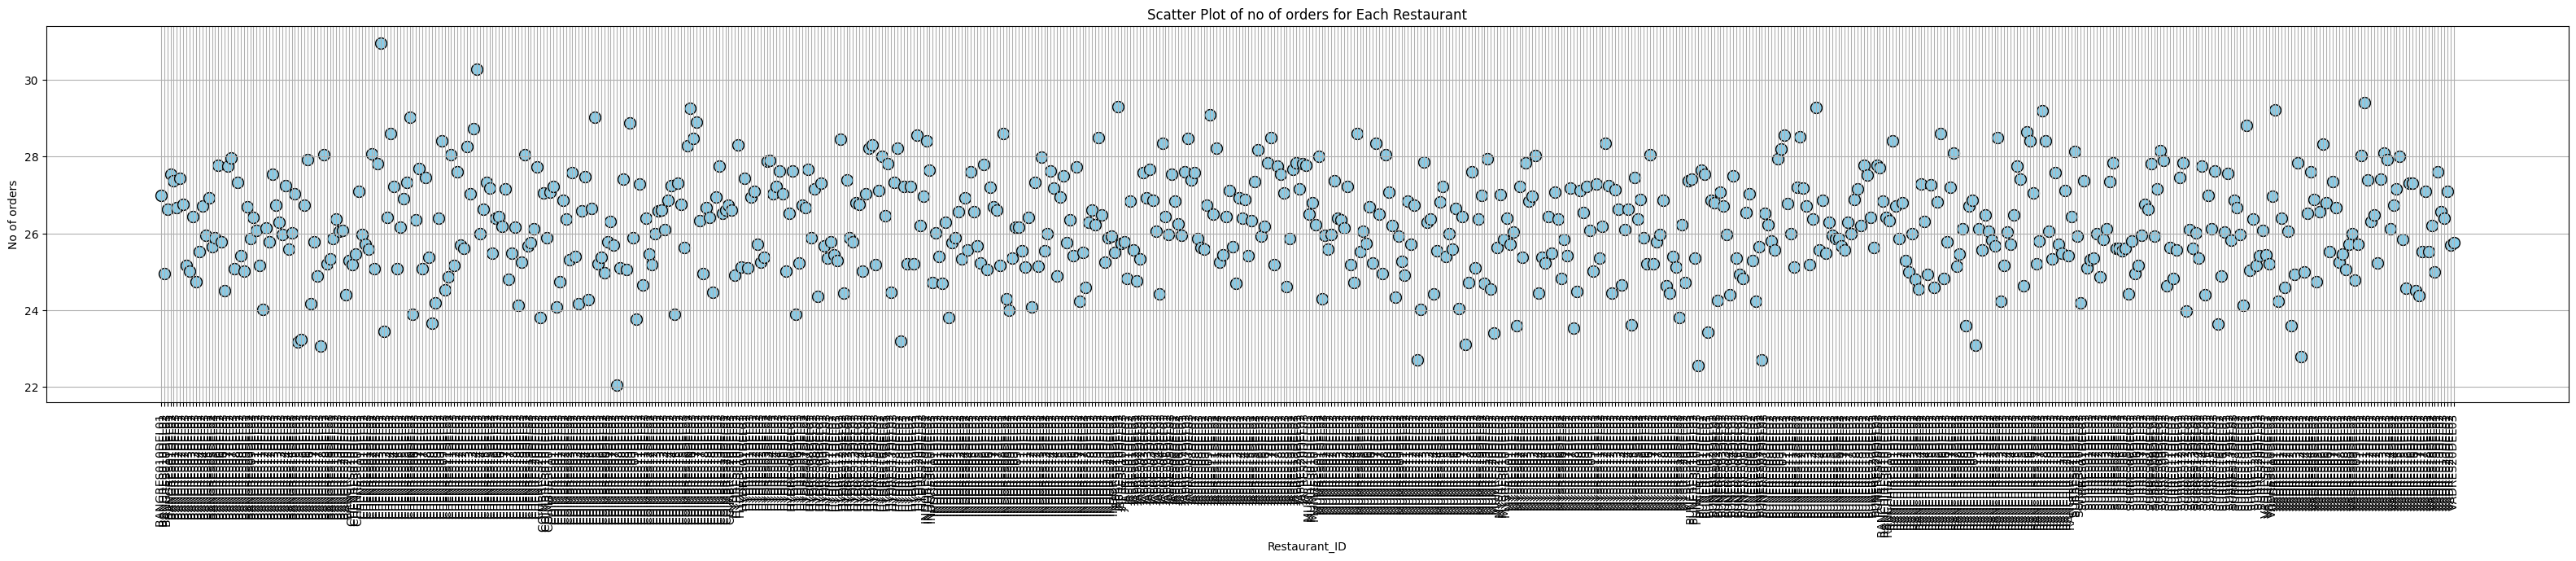

In [9]:
def plot_rest_vs_avg_orders(df):
    plt.figure(figsize=(40, 6)) 

    for i, grp in df.groupby(["Restaurant_ID"]):
        plt.scatter(i, grp['Time_taken(min)'].mean(), color='skyblue', edgecolor='black', s=100)
    plt.xlabel('Restaurant_ID')  
    plt.ylabel('No of orders')  
    plt.title('Scatter Plot of no of orders for Each Restaurant') 
    plt.xticks(rotation=90)
    plt.grid(True) 
    plt.show()

filtered_ids = count_restaurants[count_restaurants > 30].index
high_serving_rest = df[df["Restaurant_ID"].isin(filtered_ids)]
plot_rest_vs_avg_orders(high_serving_rest)


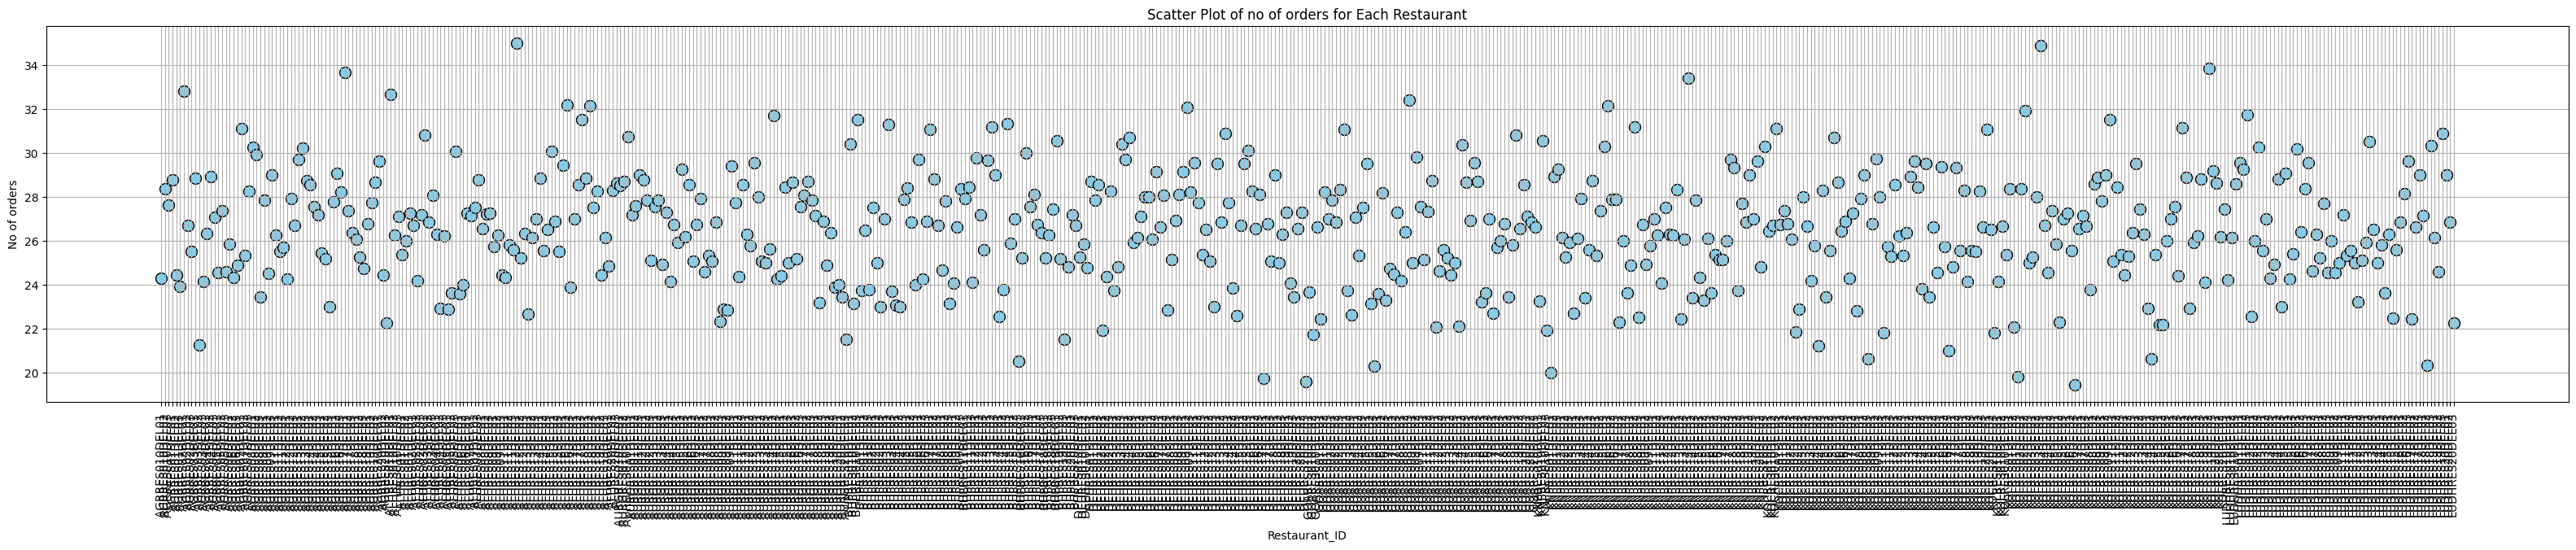

In [10]:

low_serving_rest = df[~df["Restaurant_ID"].isin(filtered_ids)]
plot_rest_vs_avg_orders(low_serving_rest)

In [11]:
df.columns

Index(['ID', 'Restaurant_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'date_column_ddmmyyy'],
      dtype='object')

### Delivery person Age Vs Time taken
### Sort the age values and plot the multiple time taken against 
### increasing age of DP


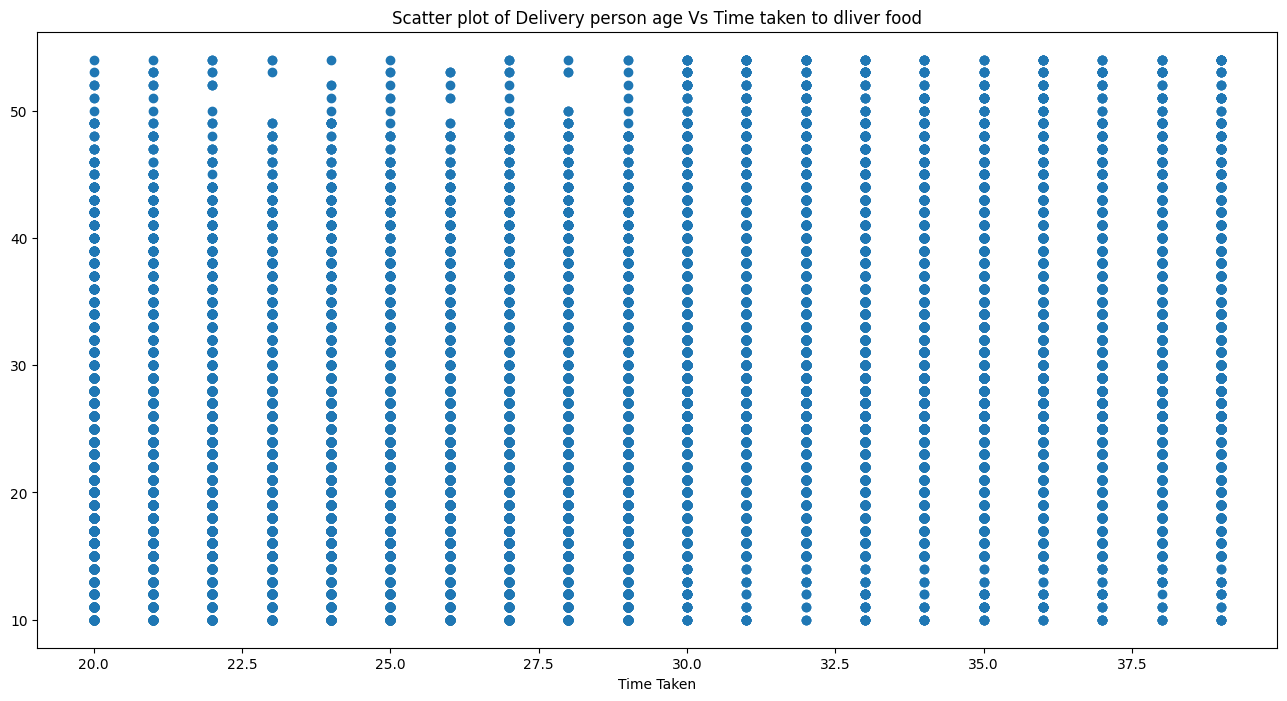

In [12]:
sorted_df = df.sort_values(by = "Delivery_person_Age",ascending=True)

plt.figure(figsize= (16,8))
plt.scatter(sorted_df["Delivery_person_Age"], sorted_df["Time_taken(min)"])
plt.xlabel("Delivery person age")
plt.xlabel("Time Taken")
plt.title("Scatter plot of Delivery person age Vs Time taken to dliver food")
plt.show()

### I couldn't get a better understanding of how Age works against Time taken
### Looking at other ways to find any insights
### I have an intuition of if Delivery person age increases the chances of Time taken 
### for delivery should also increase.
### I am trying to capture that pattern
### Trying with the average time taken for the delivery for each age group of delivery person


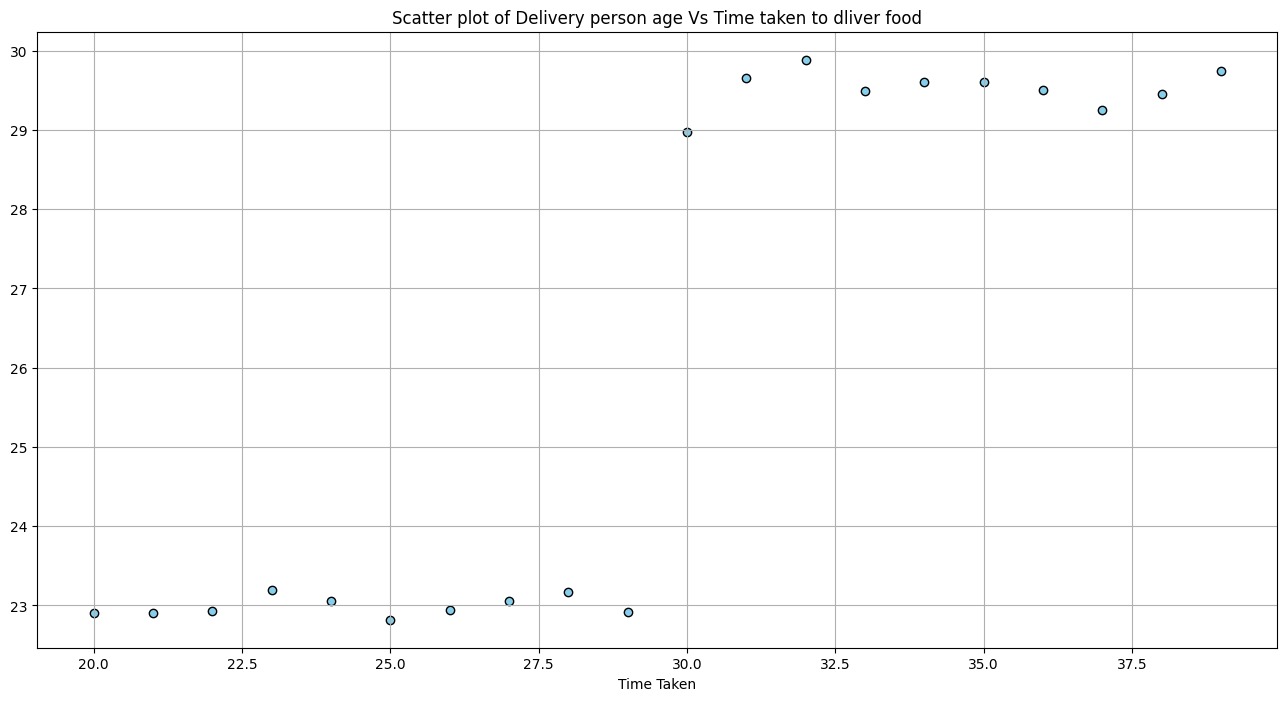

In [26]:
dp_group = df.groupby('Delivery_person_Age')
plt.figure(figsize = (16,8))
for age , group in (dp_group):
    plt.scatter(age, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("Delivery person age")
plt.xlabel("Time Taken")
plt.title("Scatter plot of Delivery person age Vs Time taken to dliver food")
plt.grid(True)
plt.show()

### There is a striking difference of 6min delivery time
### For DP of age above and below 30 can make the delivery time difference
### This is one of the features that determine the Time taken 
### But not the sole criteria in predicting the time taken

In [20]:
df.sort_values(by =["Delivery_person_Ratings"], ascending=True)["Delivery_person_Ratings"]

28397    2.5
25597    2.5
40885    2.5
37699    2.5
28142    2.5
        ... 
10105    5.0
10104    5.0
39696    5.0
9906     5.0
19815    5.0
Name: Delivery_person_Ratings, Length: 43862, dtype: float64

#### For ratings i am expecting the DP has their utmost priority for their ratings
#### There are many factors involving the ratings
#### Fastest delivery, getting food safely, following the delivery instructions
#### Some customers care about their order reaching safely than reaching fast
#### Some customers give high ratings if there is a difficulty involved while delivering
#### There can be a complex pattern underlying for the ratings and time taken
#### But there should be decreasing relationship present 

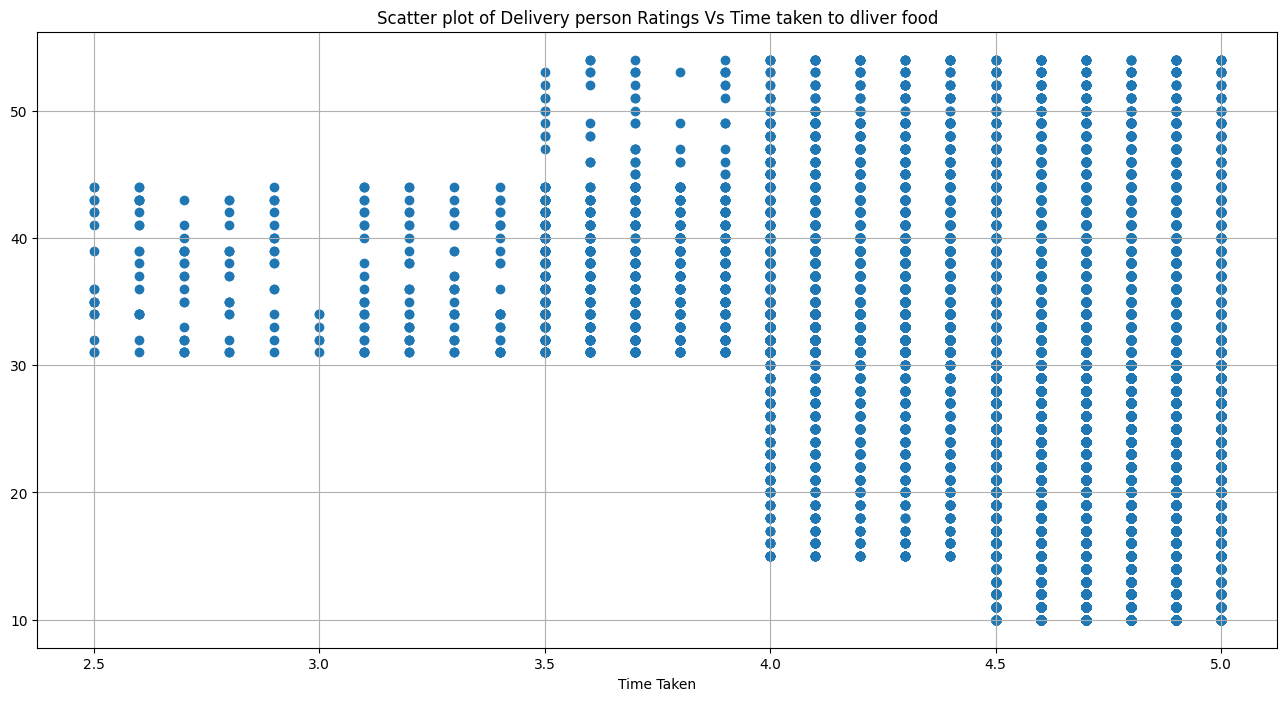

In [28]:
sorted_df = df.sort_values(by = "Delivery_person_Ratings",ascending=True)

plt.figure(figsize= (16,8))
plt.scatter(sorted_df["Delivery_person_Ratings"], sorted_df["Time_taken(min)"])
plt.xlabel("Delivery_person_Ratings")
plt.xlabel("Time Taken")
plt.title("Scatter plot of Delivery person Ratings Vs Time taken to dliver food")
plt.grid(True)
plt.show()

#### If we dissect the above plot into four quadrants
#### 1. Deliveries < 4* rating and time taken <30 mins -> there is no single order 
#####      there are 2 possibilities => Actually there are no orders or customers don't tend to give #####   higher ratings if the delivery time is greater than 30mins

####
####
#### 2. Deliveries < 4* rating and time taken >30 mins 
#####   Customers usually don't prefer late delivery unless there is a reason. So late deliverues=> less ratings

####
####
#### 3. Deliveries > 4* rating and time taken >30 mins 
#####   Customers give more than 4* rating even when delivery time >30mins if there is a difficulty or something careful needs to be carried or the delivery service is premium


####
####
## ("Golden Quadrant")
#### 4. Deliveries > 4* rating and time taken <30 mins 
#####   This is a golden quadrant we have to take a look into. We need to see how DP are capable of delivering in less time and able to get more than 4* ratings

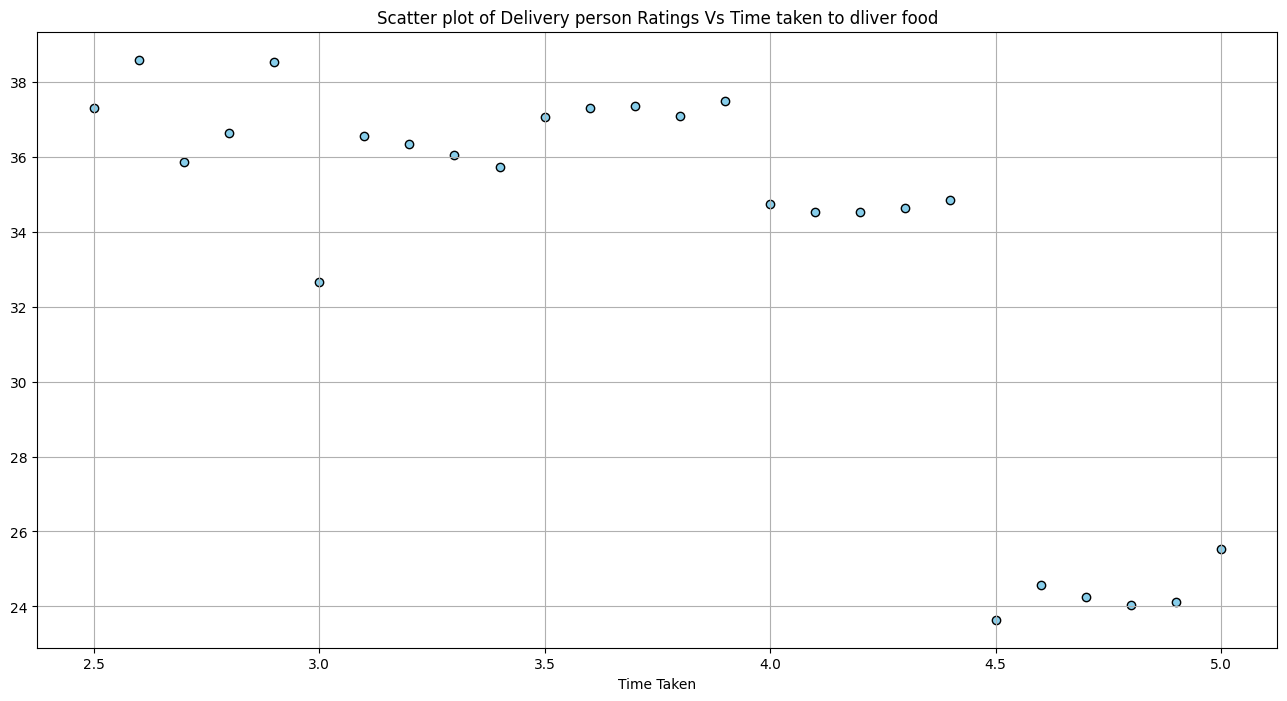

In [29]:
dp_group = df.groupby('Delivery_person_Ratings')
plt.figure(figsize = (16,8))
for age , group in (dp_group):
    plt.scatter(age, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("Delivery person Ratings")
plt.xlabel("Time Taken")
plt.title("Scatter plot of Delivery person Ratings Vs Time taken to dliver food")
plt.grid(True)
plt.show()

#### There was a clear picture of less time taken to higher ratings
#### there is a decreasing relationship but in a step wise manner

# Calculate the distance feature  -> Haversine Formula
#### From 'Restaurant_latitude', 'Restaurant_longitude',
#### 'Delivery_location_latitude', 'Delivery_location_longitude'


In [45]:
def calculate_dist_res_del_locatio(x):
    res_lat_long = (x['Restaurant_latitude'], x['Restaurant_longitude'])
    del_lat_long = (x['Delivery_location_latitude'], x['Delivery_location_longitude'])

    return geopy.distance.geodesic(res_lat_long, del_lat_long).miles

df["distance_rest_del_loc"] = df.apply(lambda x : calculate_dist_res_del_locatio(x), axis =1)

#### Before moving to analyze the relations between Time taken and the distance
#### We meed to remove the time taken for the restaurant to prepare the food
#### In most of the cases restaurants takes too much time to make a single order due high demand in orders

In [58]:
def calcualate_time_diff(x1, x2 ):
    return (pd.to_datetime(x1) -
            pd.to_datetime(x2)).total_seconds()/60.0

df["Time_diff_res_picked"] = df.apply(lambda x : 
                                      calcualate_time_diff(x["Time_Order_picked"], x["Time_Orderd"]), axis = 1)
df["Time_DP_travelled"] = df["Time_taken(min)"] - df["Time_diff_res_picked"]